# Code 3
- Numerical & Categorical EDA
- Intermediate Numerical Imputation and Transformation
- Logistic Model

## Import Libraries

In [1]:
import pandas as pd

## Import Data

In [2]:
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

## We Combine both Datasets to perform Missing Value Imputation

In [3]:
all_data = [train, test]

In [4]:
# Combine both to check Missing Value
pd.concat([train, test], axis = 0).isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        2
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


## EDA - Check Numerical Variables

In [6]:
# Lets Import the Seaborn Library
import seaborn as sns

### Lets Starts with - ApplicantIncome

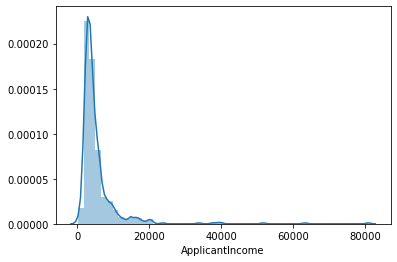

In [7]:
sns.distplot(train['ApplicantIncome'])
# Not Normal

In [8]:
# We need to import numpy for the same
import numpy as np

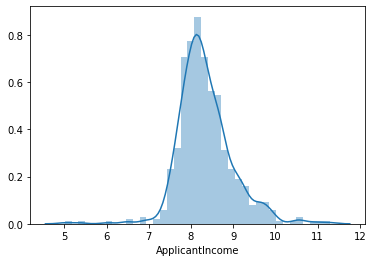

In [9]:
# Hence we need convert to a Normal Distribution
sns.distplot(np.log(train['ApplicantIncome']))

### CoapplicantIncome

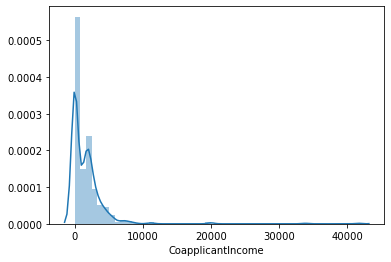

In [10]:
sns.distplot(train['CoapplicantIncome'])
# Not Normal

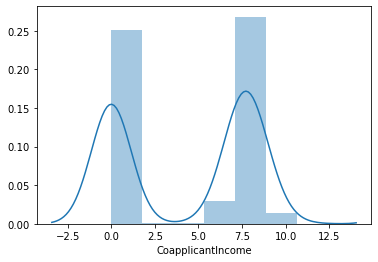

In [11]:
# Hence we need convert to a Normal Distribution
# Need to add 1 as there 0's 
sns.distplot(np.log(train['CoapplicantIncome']+1))

### LoanAmount

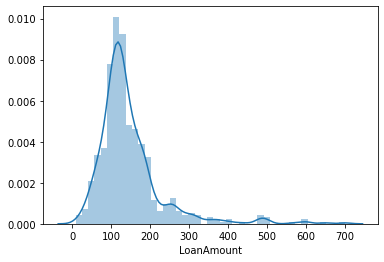

In [12]:
sns.distplot(train['LoanAmount'])
# Not Normal

### Loan_Amount_Term

In [13]:
#sns.distplot(train['Loan_Amount_Term']+1)
# Not Continuous

In [14]:
#sns.catplot(x='Loan_Status', data=df_train, hue='Gender')

## 1/ Impute Numerical Variables

### ApplicantIncome

In [15]:
for dataset in all_data:
    dataset['ApplicantIncome'] = dataset['ApplicantIncome'].fillna(dataset['ApplicantIncome'].median())
    dataset['ApplicantIncome'] = np.log(dataset['ApplicantIncome'])

### CoapplicantIncome

In [16]:
for dataset in all_data:
    dataset['CoapplicantIncome'] = np.log(dataset['CoapplicantIncome']+1)

### LoanAmount

In [17]:
for dataset in all_data:
    dataset['LoanAmount'] = dataset['LoanAmount'].fillna(dataset['LoanAmount'].median())
    dataset['LoanAmount'] = np.log(dataset['LoanAmount'])

### Loan_Amount_Term

In [18]:
for dataset in all_data:
    dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].median())

### Credit_History

In [19]:
for dataset in all_data:
    dataset['Credit_History'] = dataset['Credit_History'].fillna(dataset['Credit_History'].median())

## 2/ Impute Categorical Variables
- Lets try another Strategy of Imputing "Missing" where a Category value is missing

### Gender

In [20]:
for dataset in all_data:
    dataset['Gender'] = dataset['Gender'].fillna('Missing')

### Married

In [21]:
for dataset in all_data:
    dataset['Married'] = dataset['Married'].fillna('Missing')

### Dependents

In [22]:
for dataset in all_data:
    dataset['Dependents'] = dataset['Dependents'].fillna('Missing')

### Self_Employed

In [23]:
for dataset in all_data:
    dataset['Self_Employed'] = dataset['Self_Employed'].fillna('Missing')

## Now Re Check all of them

In [24]:
# Combine both to check Missing Value
pd.concat([train, test], axis = 0).isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
dtype: int64

## Prepare Data for Model Model

In [25]:
# Check Variables
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,8.651724,0.000000,4.700480,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,8.031385,7.313887,4.836282,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,8.517193,7.496097,5.337538,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,7.757906,7.842671,4.605170,360.0,1.0,Urban
4,LP001051,Male,No,0,Not Graduate,No,8.094378,0.000000,4.356709,360.0,1.0,Urban


In [26]:
X = train.drop(['Loan_Status','Loan_ID'], axis =  1)
y = train['Loan_Status']

### Create Dummy Variables for  Categorical Variables

In [27]:
X = pd.get_dummies(X)

## Build Model

In [28]:
#Start by importing library
from sklearn.linear_model import LogisticRegression

#Initialize
clf = LogisticRegression(max_iter = 1000)

In [29]:
model = clf.fit(X, y)

## Check Accuracy of Model on Train Data

In [30]:
# Predict on Train Data
y_pred = model.predict(X)

### We can use a Accuracy Function from Metrics

In [31]:
from sklearn.metrics import accuracy_score

In [32]:
y_true = train['Loan_Status']

In [34]:
print(f" Train Accuracy : {accuracy_score(y_true, y_pred):0.1%}")

 Train Accuracy : 80.9%


## Predict using Test X variables for Submitting to Competition

### Prepare X variables From test Data

In [35]:
X_test = test.drop(['Loan_ID'], axis =  1)

In [36]:
X_test.to_csv('X_test.csv', index = False)

In [37]:
#Covert to Dummies
X_test = pd.get_dummies(X_test)

In [39]:
#X_test['Married_Missing']  = 0

In [40]:
# We will use (Y/N) to match it to the Competition Submission Data
X_test_prep = model.predict(X_test)

## Create Submission File

In [41]:
sample_submission = pd.read_csv('sample_submission.csv')
sample_submission.head()

,Loan_ID,Loan_Status
0,LP001015,N
1,LP001022,N
2,LP001031,N
3,LP001035,N
4,LP001051,N


In [42]:
submission = pd.DataFrame({
    'Loan_ID' : test['Loan_ID'],
    'Loan_Status' : X_test_prep
})

## Export Submission File

In [43]:
submission.to_csv('output/O3_LR_Inter_Impute.csv', index = False)

In [44]:
# LB Accuracy : 0.7777